In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_parquet('../data/train_test/full_valid.parquet.gzip')

In [14]:
df.shape

(174652, 25)

In [16]:
len(df['pickup_longitude'].unique())

13939

In [12]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year_month_day,daily_preciptation_normal_inches,max_temperature_normal_f,min_temperature_normal_f,avg_temperature_normal_f,BIKE_LANE,BOROCODE,ST_WIDTH,TRAFDIR,RW_TYPE,SNOW_PRI,PRE_DIRECT,PRE_TYPE,POST_TYPE,BIKE_TRAFD,SEGMENT_TY
0,id1718206,1,2016-01-05 10:07:14,1,-73.990273,40.766647,-73.992729,40.748363,N,20160105,0.12,40,29,35,NULL_VALUE,1,44.0,FT,2,C,NULL_VALUE,NULL_VALUE,AVE,NULL_VALUE,R
1,id1748564,2,2016-01-07 14:38:51,1,-73.976311,40.759819,-73.957603,40.779598,N,20160107,0.12,40,29,34,1,1,60.0,FT,1,C,NULL_VALUE,AVE,NULL_VALUE,FT,U
2,id3792886,1,2016-05-29 22:11:39,2,-74.006760,40.749096,-73.972206,40.757252,N,20160529,0.14,75,59,67,NULL_VALUE,1,54.0,FT,2,C,NULL_VALUE,NULL_VALUE,AVE,NULL_VALUE,R
3,id2541269,2,2016-03-01 12:33:26,5,-73.982689,40.782124,-73.956490,40.781673,N,20160301,0.13,45,32,39,NULL_VALUE,1,32.0,FT,2,C,NULL_VALUE,NULL_VALUE,PKWY,NULL_VALUE,R
4,id3152266,2,2016-04-14 18:52:23,1,-73.802071,40.663708,-73.982391,40.766552,N,20160414,0.13,61,45,53,NULL_VALUE,4,36.0,FT,2,C,NULL_VALUE,NULL_VALUE,EXPY,NULL_VALUE,U


In [2]:
df = pd.read_parquet('../data/processed_encoded/full_valid.parquet.gzip')

In [3]:
df.head()

,avg_temperature_normal_f,dropoff_cluster,vendor_id,pickup_cluster,min_temperature_normal_f,daily_preciptation_normal_inches,day_of_week,max_temperature_normal_f,ST_WIDTH,hour_of_day,pickup_datetime,passenger_count,period_of_day_afternoon,period_of_day_morning,period_of_day_evening,period_of_day_dawn,TRAFDIR_FT,TRAFDIR_TF,TRAFDIR_TW,TRAFDIR_NULL_VALUE,TRAFDIR_NV,SNOW_PRI_C,SNOW_PRI_S,SNOW_PRI_H,SNOW_PRI_V,SNOW_PRI_NULL_VALUE,BIKE_LANE_1,BIKE_LANE_NULL_VALUE,BIKE_LANE_2,BIKE_LANE_3,BIKE_LANE_6,BIKE_LANE_9,SEGMENT_TY_U,SEGMENT_TY_R,SEGMENT_TY_T,SEGMENT_TY_NULL_VALUE,SEGMENT_TY_E,SEGMENT_TY_B,SEGMENT_TY_C,BIKE_TRAFD_FT,BIKE_TRAFD_TF,BIKE_TRAFD_NULL_VALUE,BIKE_TRAFD_TW,RW_TYPE_1,RW_TYPE_3,RW_TYPE_2,RW_TYPE_9,RW_TYPE_NULL_VALUE,RW_TYPE_14,RW_TYPE_6,RW_TYPE_4,RW_TYPE_13,POST_TYPE_NULL_VALUE,POST_TYPE_AVE,POST_TYPE_DR,POST_TYPE_ST,POST_TYPE_PKWY,POST_TYPE_PL,POST_TYPE_RD,POST_TYPE_EXPY,POST_TYPE_TER,POST_TYPE_BLVD,POST_TYPE_CONC,POST_TYPE_RTE,POST_TYPE_TUNL,BOROCODE_1,BOROCODE_4,BOROCODE_3,BOROCODE_NULL_VALUE,BOROCODE_2,PRE_DIRECT_NULL_VALUE,PRE_DIRECT_W,PRE_DIRECT_N,PRE_DIRECT_S,PRE_DIRECT_E,PRE_TYPE_AVE,PRE_TYPE_NULL_VALUE,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,35,0,1,0,29,0.12,1,40,44.0,10,2016-01-05 10:07:14,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
1,34,3,2,0,29,0.12,3,40,60.0,14,2016-01-07 14:38:51,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,67,0,1,0,59,0.14,6,75,54.0,22,2016-05-29 22:11:39,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
3,39,3,2,0,32,0.13,1,45,32.0,12,2016-03-01 12:33:26,5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
4,53,0,2,1,45,0.13,3,61,36.0,18,2016-04-14 18:52:23,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0


# Aggregate by day

In [4]:
def p99(x):
    return x.quantile(0.99)

def p75(x):
    return x.quantile(0.75)

In [5]:
# Start with basic ones to create a baseline
df['year_month_day'] = df['pickup_datetime'].apply(lambda x:datetime.strftime(x, '%Y%m%d')).astype(int)

In [6]:
# Need to onehot encode clusters and vendors, to aggregate properly

df_agg = df.groupby('year_month_day').agg({
        'vendor_id' : 'count',
        'max_temperature_normal_f' : 'max',
        'min_temperature_normal_f' : 'max',
        'daily_preciptation_normal_inches' : 'max',
        'passenger_count' : 'sum',
        'day_of_week' : 'max',
        'period_of_day_dawn' : 'sum',
        'period_of_day_morning' : 'sum',
        'period_of_day_afternoon' : 'sum',
        'period_of_day_evening' : 'sum'
    }).reset_index()

In [7]:
features_rename = [
    'year_month_day',
    'qty_travels_today',
    'max_temperature_normal_f',
    'min_temperature_normal_f',
    'daily_preciptation_normal_inches',
    'passenger_count',
    'day_of_week',
    'period_of_day_dawn',
    'period_of_day_morning',
    'period_of_day_afternoon',
    'period_of_day_evening'
]

In [8]:
df_agg.columns = features_rename

<Axes: >

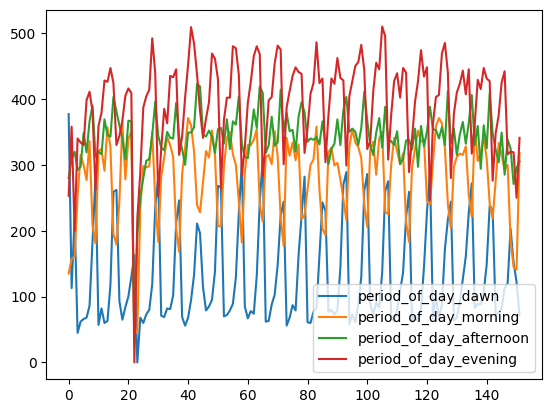

In [9]:
# Maybe cutoff 21/jan and last 5 days
df_agg.sort_values(by='year_month_day')[['period_of_day_dawn', 
                                         'period_of_day_morning', 
                                         'period_of_day_afternoon',
                                         'period_of_day_evening']].plot()

Maybe cutoff 21/jan and last 5 days.  
For regression tabular models create features with lag 1 to lag 7, to capture weekly behavior

# Fix Target

In [79]:
df_agg['qty_travels'] = df_agg.qty_travels_today.shift(-1)

In [80]:
df_agg = df_agg.iloc[:-1].reset_index(drop=True)

<Axes: >

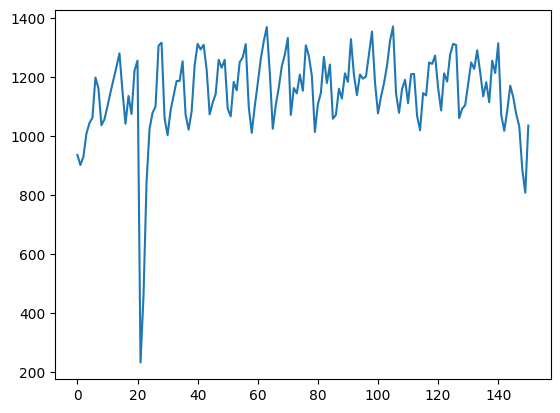

In [82]:
df_agg.qty_travels.plot()

In [81]:
df_agg.head()

,year_month_day,qty_travels_today,max_temperature_normal_f,min_temperature_normal_f,daily_preciptation_normal_inches,passenger_count,day_of_week,period_of_day_mean,period_of_day_p75,period_of_day_p99,hour_of_day_mean,hour_of_day_p75,hour_of_day_p99,qty_travels
0,20160101,1045,41,30,0.12,1855,4,1.695694,3.0,3.0,10.680383,17.0,23.0,936.0
1,20160102,936,40,30,0.12,1614,5,1.294872,2.0,3.0,14.418803,19.0,23.0,902.0
2,20160103,902,40,29,0.11,1552,6,1.356984,2.0,3.0,11.768293,17.0,23.0,930.0
3,20160104,930,40,29,0.13,1523,0,1.148387,2.0,3.0,14.366667,19.0,23.0,1008.0
4,20160105,1008,40,29,0.12,1639,1,1.159722,2.0,3.0,13.773810,19.0,23.0,1044.0
